# Examen 2: POO
fecha: 30/11/2023
* El examen se aprueba con 60 puntos. Tienen hasta 11.15 am. 
* Entregar un solo archivo Jupyter con nombre y apellido.
* Todas las consignas deben tener justificación con texto y explicación conceptual. No del código sino de la razón de la operación.

Datasets:
* conversion_para_entrenar.csv
* ingreso_para_entrenar.csv
* conversion_para_predecir.csv
* costo_publicidad.csv
* conversion_real.csv

## Supermercado La gondola. Año 2092
 
El supermercado la gondola es un líder en el sector minorista, atendiendo a clientes en el planeta tierra y con una sucursal en marte. Cuenta con una diversa gama de productos que incluye alimentación, tecnología, moda, entre otros. El supermercado posee toda su operacion de manera Holografica, por lo tanto es crucial predecir la conversión de los clientes dado su comportamiento. La idea será efectuar una campaña de marketing en aquello clientes que un algoritmo clasifique como compradores. Ahora bien dado que el costo de las publicidades holograficas es elevado, la empresa quiere solo publicitar en los clientes de alto valor. Para esto es importante generar una regresion que permita predecir el ingreso del cliente. 
 
Tu tarea como cientifico de datos es crear los dos algoritmos y luego calcular el rango de ganancia esperada de la propuesta, justificando tus servicios en el ROI del supermercado. 

	


# Clasificacion  (30 pts)
**total de la consigna (30 pts) Separado en preprocesamiento 20pts y modelo 10pts**

1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

```python

def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']
```
3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)
```python
df_con_dummies = pd.get_dummies(df, columns=["cols_for_one_hot"])
```

### Modelo (10pts)
4. Separar train y test. Fitear un arbol de profundidad 3. 

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
```
5. Crear y_pred
6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test
```python
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
```
5. Explicar la metrica precision_score en palabras. Que significa en este contexto?

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 
```python
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Clase1', 'Clase2'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 
```

###  Regresión (20 pts)

Instrucciones y Puntaje:
1. Valores faltantes. (5 pts)

Este dataset **no tiene valores outliers** para que sea mas fácil la resolución del examen. 
Lo que si **tiene son valores nulos** en solo dos columnas. 

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

3.Entrenamiento y Validación del Modelo de Regresión (10 pts)
* Divida el conjunto de datos en entrenamiento y test. 
* Entrene un algoritmo de regresion que prediga ingreso.


```python
import statsmodels.api as sm
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
```
* Evalue el modelo utilizando la metrica MAPE




```python
import numpy as np
predicciones = modelo.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")
```
* Interprete los coeficiente que significan (Explicar en palabras)
* Intereprete el error MAPE que significa? (Explicar en palabras)



##  Integración de Modelos y ROI en Publicidad 


## Explicación:

### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

### Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = FP_{count} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{count}$ es el número de falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv








#### Cálculo del ROI



\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}




## Consignas ganancia del modelo (50pts):
a. Utilice para predecir los datasets correspondientes.
b. ¿Cual es el valor esperado del algoritmo? 
c. Dado el resultado del modelo en el punto 1 del examen (1. Clasificacion). De 1000 clientes ¿Cuantos espera que sea Falsos positivos? Con esa suposición calcule el costo de publicidad total. 
d. Paso un mes y sabemos quienes convirtieron. conversion_real.csv. Calcule el roi (hint: vaya calculando cada elemento de la ecuación)
e. Que cliente tiene mayor ROI? 
hint: 
```python
.nlargest(1, 'roi')
```
f. ¿Cual es el ROI real del modelo?


In [609]:
import pandas as pd
from funciones_importantes import *


original = pd.read_csv('conversion_para_entrenar.csv')
original




,Unnamed: 0,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,0,1,9,91.231,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,1,2,5,740.422,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,2,3,6,15.947,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,3,4,5,950.486,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,4,5,5,63.657,26,1982-11-23 12:27:39.148023,Marte,ordenador,No
...,...,...,...,...,...,...,...,...,...
2995,2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2996,2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2997,2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No
2998,2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No


Guardo una copia del df original por las dudas apra tener un respaldp

In [610]:
df = original.copy()

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = df.drop(columns=['Unnamed: 0'])


In [611]:
df.shape

(3000, 8)

El df tiene 3000 filas y 8 columnas

In [612]:
df

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,1,9,91.231,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,2,5,740.422,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,3,6,15.947,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,4,5,950.486,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,5,5,63.657,26,1982-11-23 12:27:39.148023,Marte,ordenador,No
...,...,...,...,...,...,...,...,...
2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No
2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No


In [613]:
validate_columns(df)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,id del cliente,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3000,0,"[10, 2647, 2701, 2219, 2516]",0.000
1,páginas visitadas,"[9, 5, 6, 8, 4, 3, 7, 2, 1, 10, 11, 12, 0, 36,...",40,0,"[2, 6, 4, 6, 3]",0.000
2,duración de la sesión,"[91.23141776314915, 740.4216980891094, 15.9472...",3000,0,"[335.7081861700988, 295.5577157879365, 1135.81...",0.000
3,número de visitas,"[39, 11, 3, 18, 26, 14, 21, 29, 5, 32, 24, 31,...",50,0,"[22, 6, 8, 28, 20]",0.000
4,fecha de nacimiento,"[1955-11-30 12:27:39.148023, 1998-11-19 12:27:...",90,0,"[1967-11-27 12:27:39.148023, 1967-11-27 12:27:...",0.000
5,ubicación,"[Marte, Ciudad A, Ciudad B, Ciudad C]",4,0,"[Ciudad A, Ciudad A, Ciudad B, Ciudad B]",0.000
6,dispositivo,"[tablet, móvil, ordenador]",3,0,"[móvil, ordenador, ordenador]",0.000
7,convertido,"[Sí, No]",2,0,"[Sí, Sí]",0.000


Veo que tipos de datos tiene mi df

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id del cliente         3000 non-null   int64  
 1   páginas visitadas      3000 non-null   int64  
 2   duración de la sesión  3000 non-null   float64
 3   número de visitas      3000 non-null   int64  
 4   fecha de nacimiento    3000 non-null   object 
 5   ubicación              3000 non-null   object 
 6   dispositivo            3000 non-null   object 
 7   convertido             3000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 187.6+ KB


Veo valores atipicos en cada columna

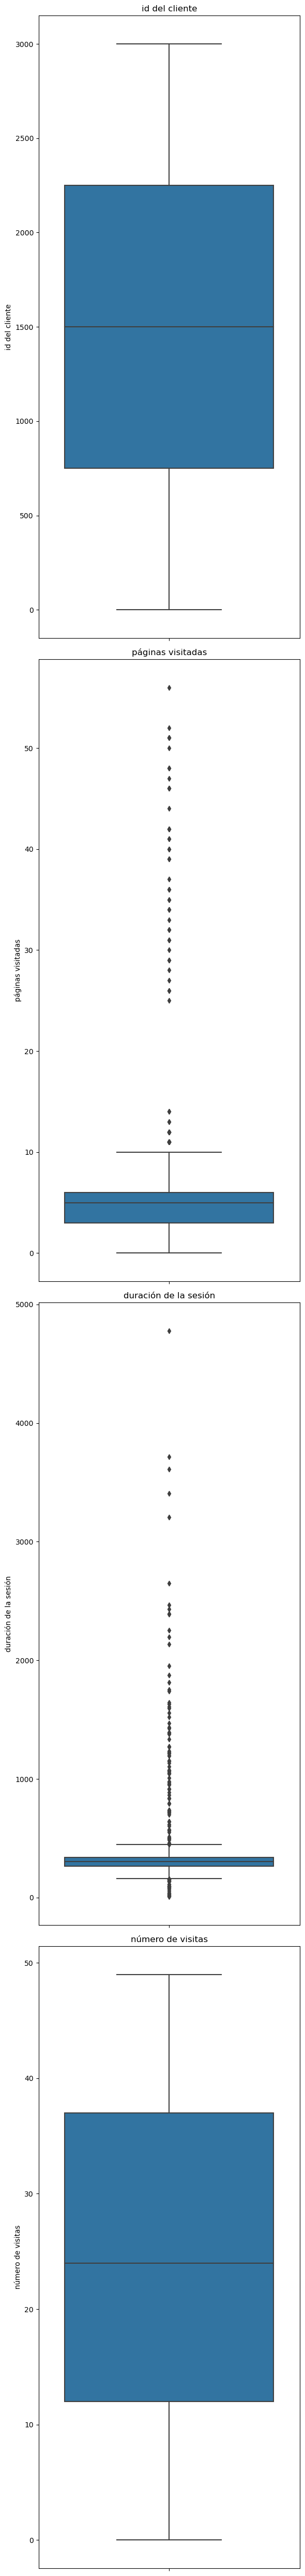

In [615]:
grafico_out_boxplot(df)

Veo outliers en duracion de la sesion y paginas visitadas
Paginas visitadas en un rando de 0 a 50 me parece razonable
Analizo duracion de la sesion

In [616]:
df.columns

Index(['id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

Veo que pasa en caso marte

In [617]:
dfmarte = df[df['ubicación']=='Marte']
dfmarte

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,1,9,91.231,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,2,5,740.422,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,3,6,15.947,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,4,5,950.486,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,5,5,63.657,26,1982-11-23 12:27:39.148023,Marte,ordenador,No
...,...,...,...,...,...,...,...,...
145,146,5,179.006,44,1987-11-22 12:27:39.148023,Marte,móvil,No
146,147,7,720.676,9,1965-11-27 12:27:39.148023,Marte,tablet,Sí
147,148,6,789.552,15,1967-11-27 12:27:39.148023,Marte,ordenador,No
148,149,7,1075.685,6,1964-11-27 12:27:39.148023,Marte,móvil,Sí


In [618]:
dfmarte.describe()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas
count,150.000,150.000,150.000,150.000
mean,75.500,4.940,858.736,23.140
std,43.445,2.303,832.423,13.464
min,1.000,0.000,8.975,0.000
25%,38.250,3.000,248.789,11.000
50%,75.500,5.000,627.992,23.000
75%,112.750,6.000,1207.837,35.750
max,150.000,12.000,4776.196,49.000


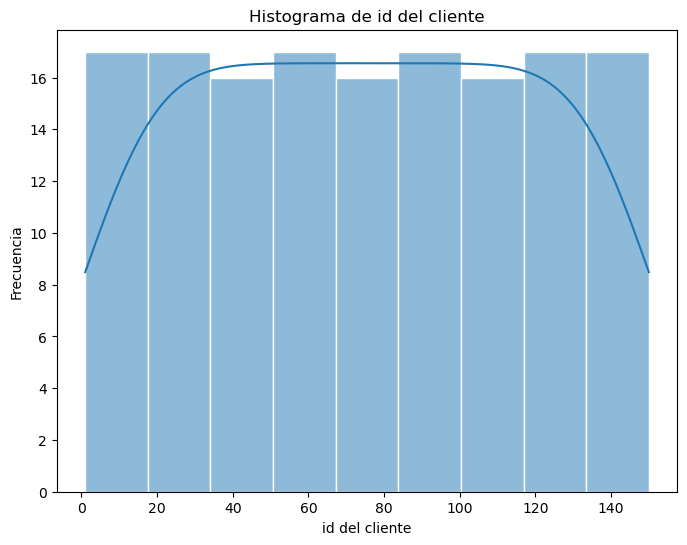

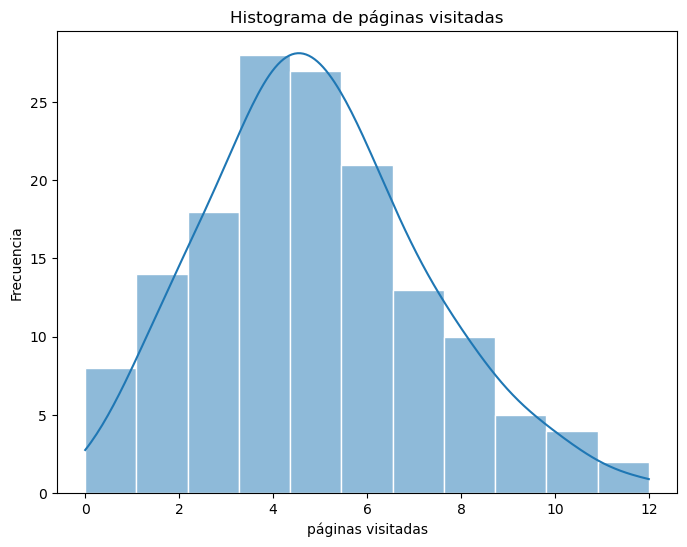

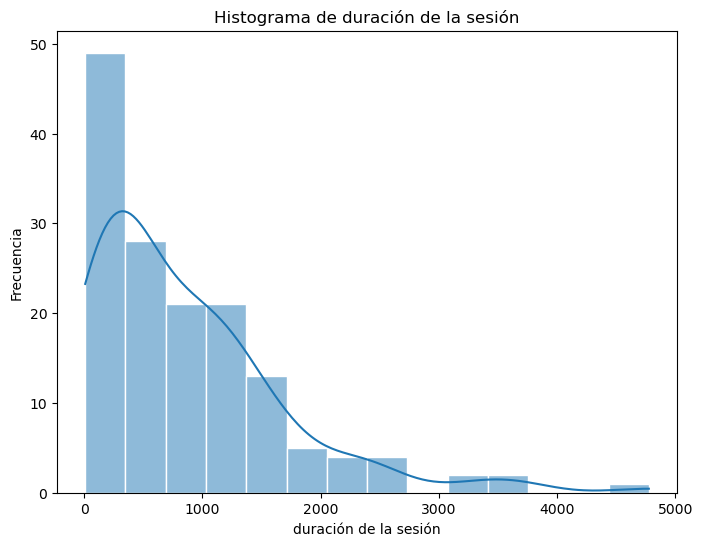

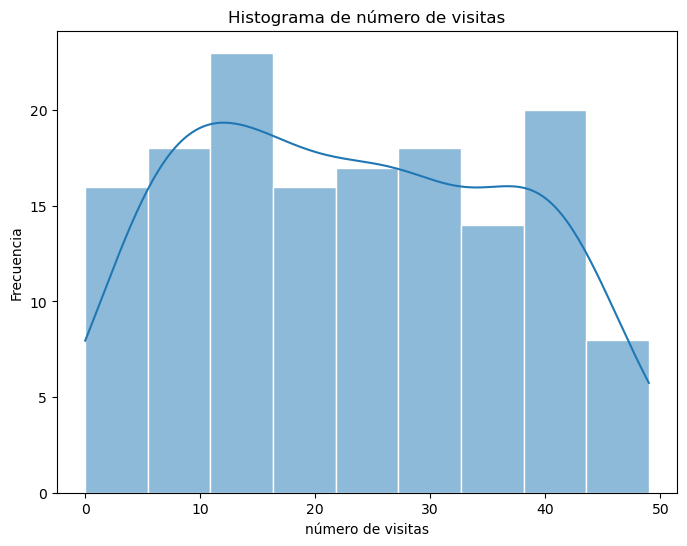

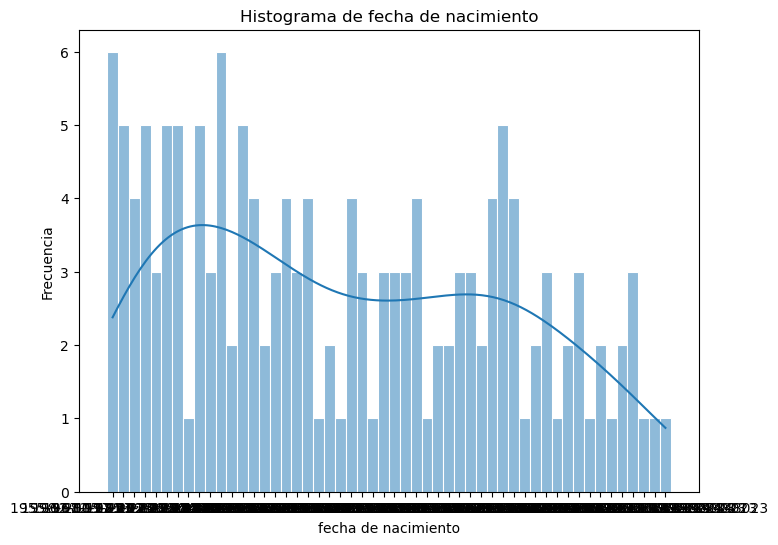

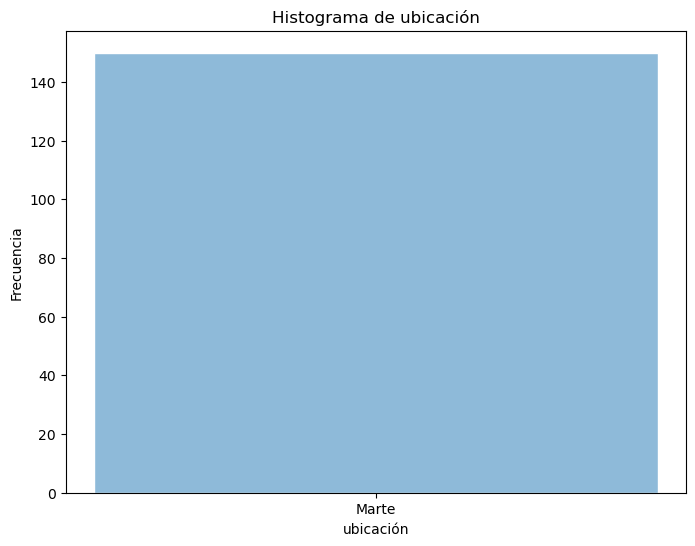

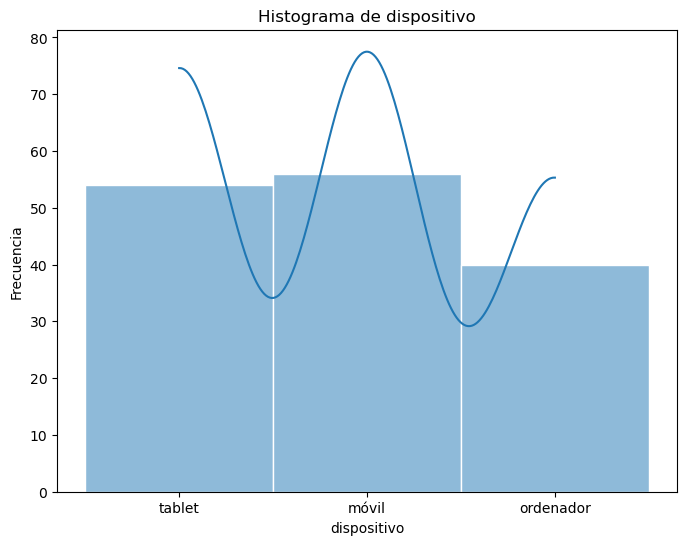

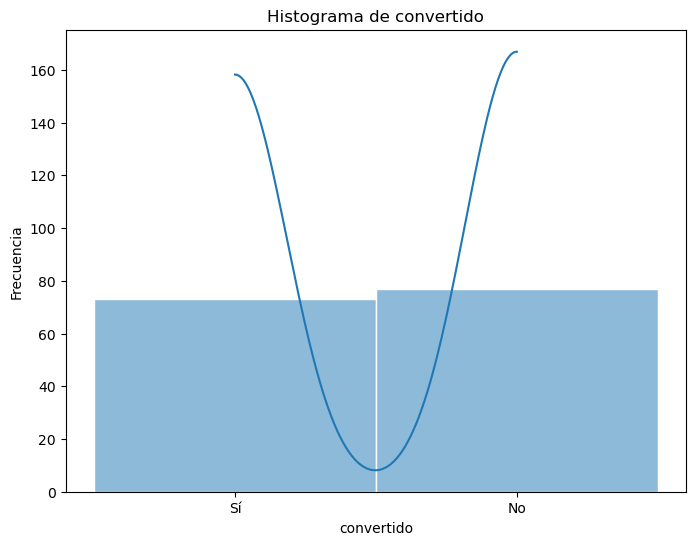

In [619]:
plot_histograms(dfmarte)

veo que el tiempo de sesion en marte tiene valores muy altos, lo voy a comparar a como es en la tierra

In [620]:
dftierra = df[df['ubicación'] !='Marte']
dftierra

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
150,151,8,414.130,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,No
151,152,3,247.931,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,No
152,153,4,261.724,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,No
153,154,2,294.077,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,No
154,155,5,363.287,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,Sí
...,...,...,...,...,...,...,...,...
2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No
2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No


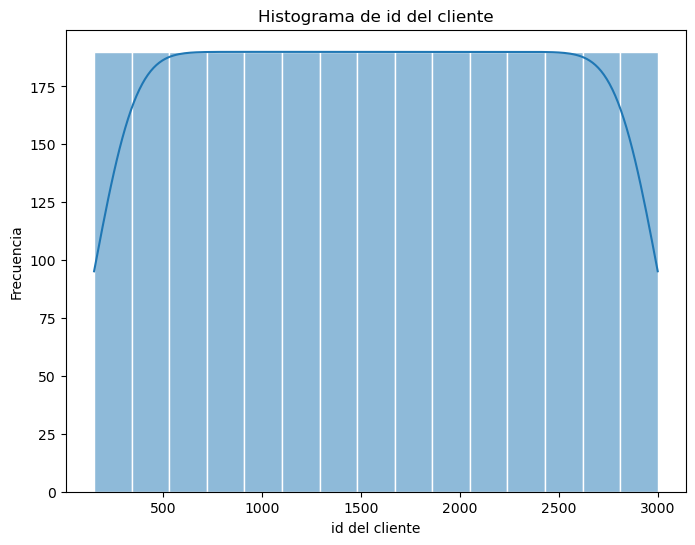

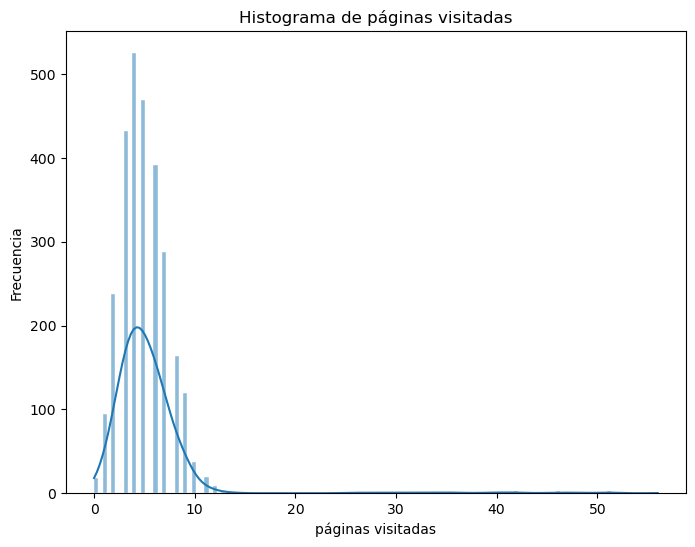

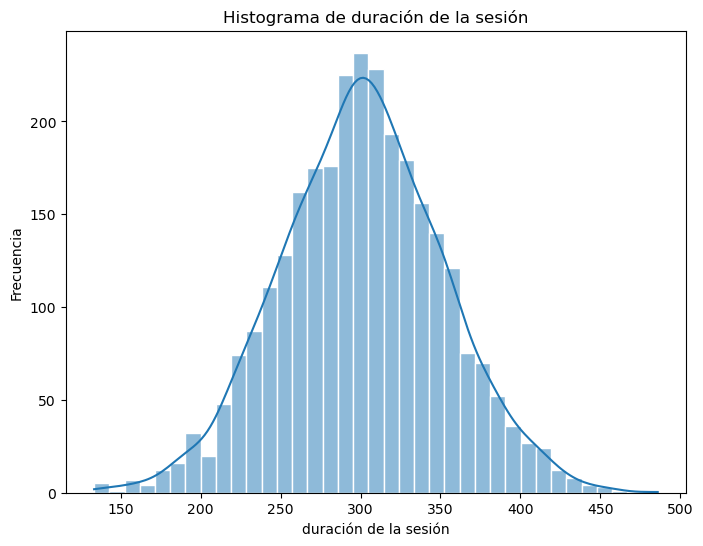

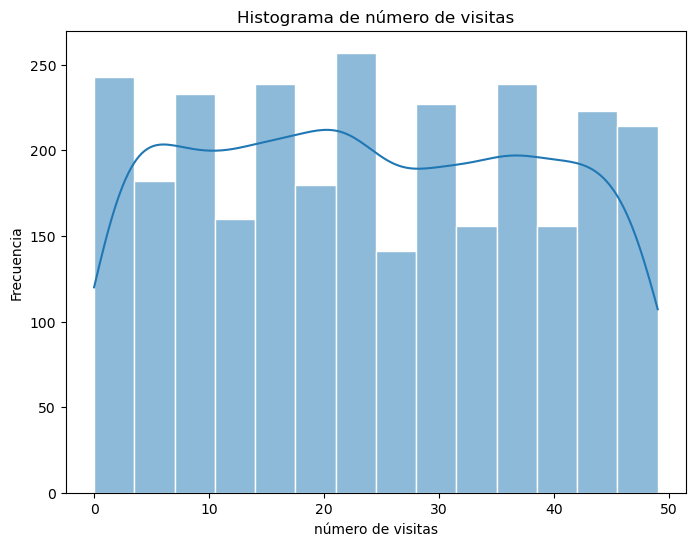

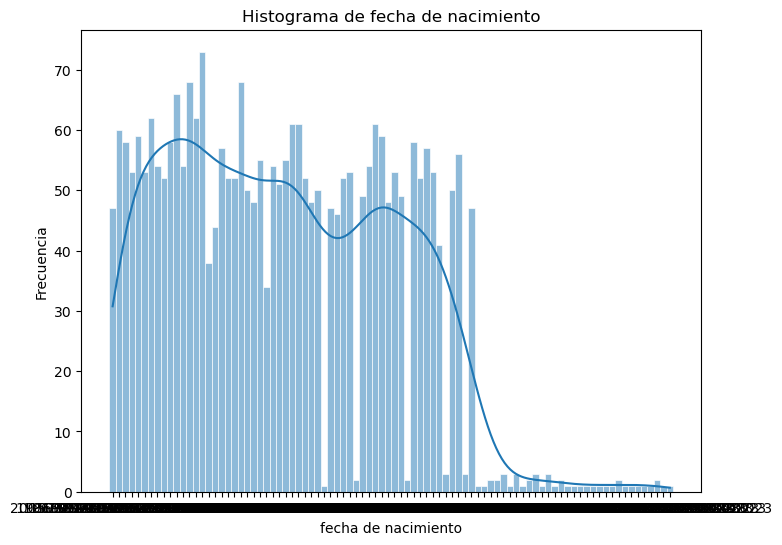

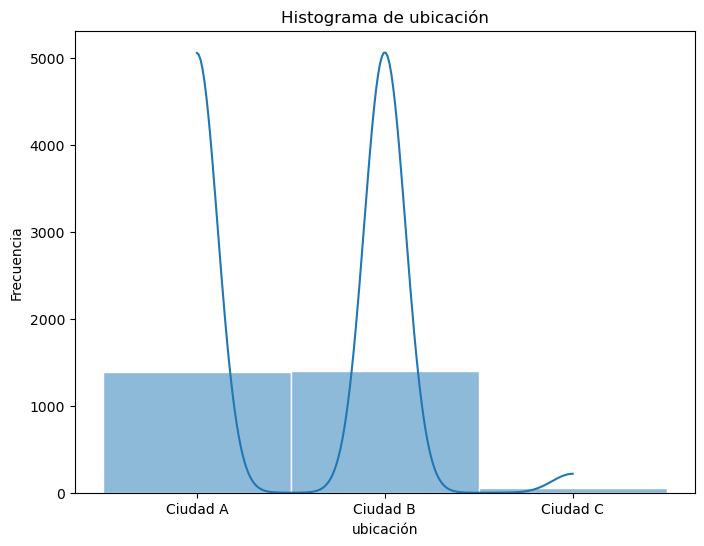

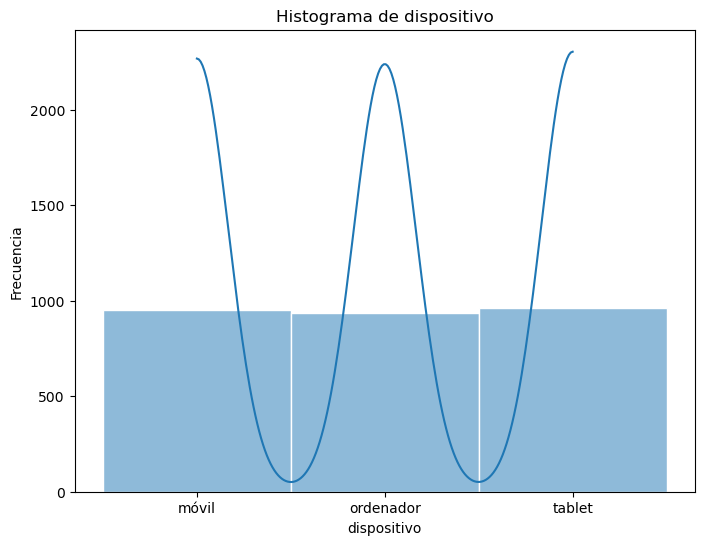

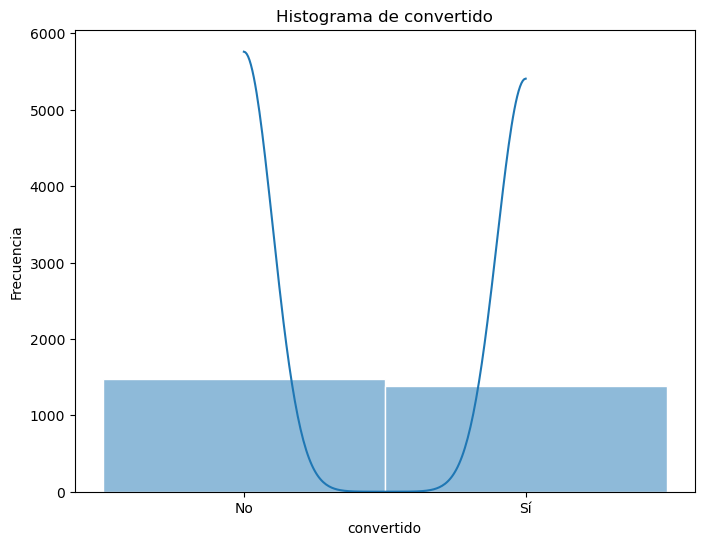

In [621]:
plot_histograms(dftierra)

Vemos que en la tierra se distribuye mas tierando a una normal

In [622]:
dfmarte['convertido'].value_counts()

convertido
No    77
Sí    73
Name: count, dtype: int64

In [623]:
dftierra['convertido'].value_counts()

convertido
No    1470
Sí    1380
Name: count, dtype: int64

In [624]:
df['ubicación'].unique()

array(['Marte', 'Ciudad A', 'Ciudad B', 'Ciudad C'], dtype=object)

In [625]:
df.columns

Index(['id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

In [626]:
from scipy.stats import ttest_ind
group1 = df[df["ubicación"]=='Marte']

group1 = group1[['duración de la sesión']]

group2 = df[df["ubicación"]!='Marte']
group2 = group2[[ 'duración de la sesión']]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
  print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de sesion entre clientes de marte y de la tierra.")
else:
  print("No rechazar la hipótesis nula.")

Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de sesion entre clientes de marte y de la tierra.


Coincide con el outlier encontrado en el grafico, para dftierra se distintribuye de una manera la duracion de la sesion (forma de campana) y para el dfmarte se distribuye mas para la izquierda pero tiene valores hasta el 5000

In [627]:
from scipy.stats import ttest_ind
group1 = df[df["ubicación"]=='Marte']

group1 = group1[['páginas visitadas']]

group2 = df[df["ubicación"]!='Marte']
group2 = group2[[ 'páginas visitadas']]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
  print("Rechazar la hipótesis nula. Hay una diferencia significativa de paginas visitadas entre clientes de marte y de la tierra.")
else:
  print("No rechazar la hipótesis nula.")

No rechazar la hipótesis nula.


Si bien con respecto a las paginas visitiadas no hay diferencia significativa entre clientes d ela tierra y marte, debo borrar la columna de marte y enfocarme en el estudio de clientes de la tierra porque la duracion de la sesion en marte si presenta diferencias significativas con la de la tierra

In [628]:
dftierra

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
150,151,8,414.130,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,No
151,152,3,247.931,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,No
152,153,4,261.724,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,No
153,154,2,294.077,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,No
154,155,5,363.287,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,Sí
...,...,...,...,...,...,...,...,...
2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No
2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No


In [629]:
#ingreso para estimar segundo punyo

dftierra sera mi df a trabajar


voy a visualizar mis valores atipicos con un grafico de cajas

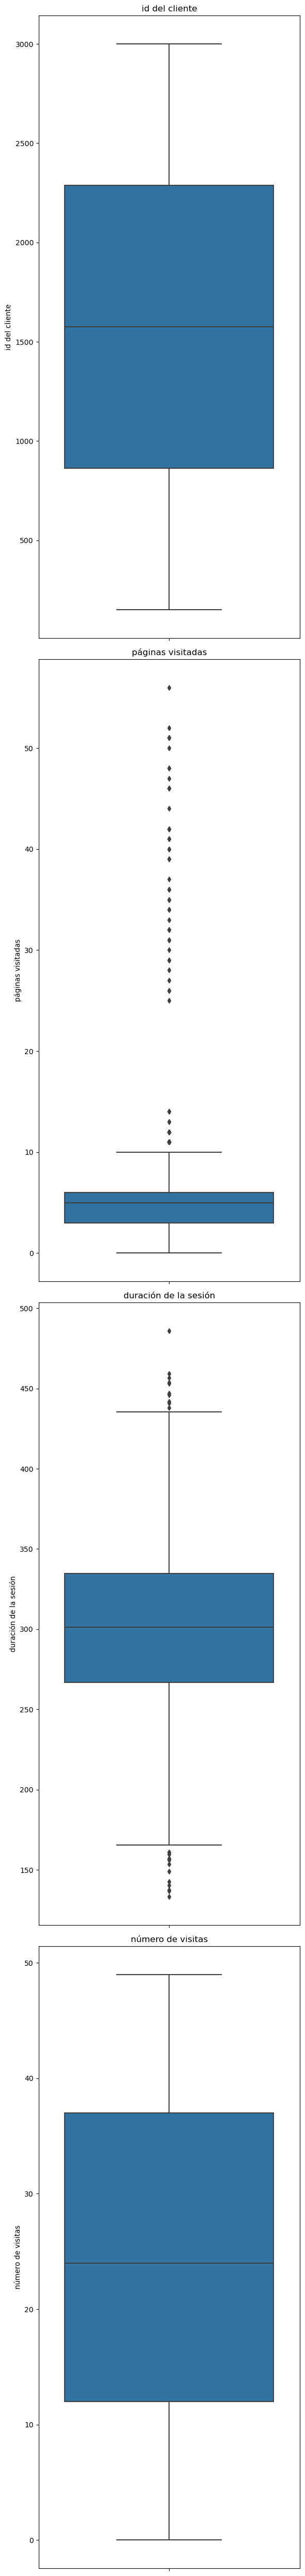

In [630]:
grafico_out_boxplot(dftierra)

In [631]:
def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    flag_column_name = f'{column_name}_is_outlier'
    dataframe[flag_column_name] = dataframe[column_name].apply(lambda x: 1 if (x < lower_bound or x > upper_bound) else 0)
    
   

    # Retornar un dataset filtrado
    return dataframe

In [632]:
dftierra.columns

Index(['id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

In [633]:
find_and_filter_outliers(dftierra,'páginas visitadas')



C:\Users\chiar\AppData\Local\Temp\ipykernel_25004\1138089892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[flag_column_name] = dataframe[column_name].apply(lambda x: 1 if (x < lower_bound or x > upper_bound) else 0)


,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido,páginas visitadas_is_outlier
150,151,8,414.130,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,No,0
151,152,3,247.931,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,No,0
152,153,4,261.724,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,No,0
153,154,2,294.077,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,No,0
154,155,5,363.287,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,Sí,0
...,...,...,...,...,...,...,...,...,...
2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No,0
2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No,0
2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No,0
2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No,0


In [634]:
find_and_filter_outliers(dftierra,'duración de la sesión')

C:\Users\chiar\AppData\Local\Temp\ipykernel_25004\1138089892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[flag_column_name] = dataframe[column_name].apply(lambda x: 1 if (x < lower_bound or x > upper_bound) else 0)


,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido,páginas visitadas_is_outlier,duración de la sesión_is_outlier
150,151,8,414.130,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,No,0,0
151,152,3,247.931,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,No,0,0
152,153,4,261.724,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,No,0,0
153,154,2,294.077,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,No,0,0
154,155,5,363.287,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,Sí,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,2996,6,213.400,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No,0,0
2996,2997,3,359.351,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No,0,0
2997,2998,9,352.962,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No,0,0
2998,2999,7,230.508,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No,0,0


In [635]:
dftierra['páginas visitadas_is_outlier'].value_counts()

páginas visitadas_is_outlier
0    2776
1      74
Name: count, dtype: int64

In [636]:
dftierra['duración de la sesión_is_outlier'].value_counts()

duración de la sesión_is_outlier
0    2827
1      23
Name: count, dtype: int64

veo los outliers

In [637]:
dftierra[dftierra['duración de la sesión_is_outlier']==1]

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido,páginas visitadas_is_outlier,duración de la sesión_is_outlier
341,342,5,459.155,30,1981-11-23 12:27:39.148023,Ciudad B,móvil,No,0,1
884,885,5,161.032,30,1980-11-23 12:27:39.148023,Ciudad B,ordenador,Sí,0,1
924,925,3,140.452,15,1996-11-19 12:27:39.148023,Ciudad B,móvil,No,0,1
935,936,2,133.321,16,1971-11-26 12:27:39.148023,Ciudad B,móvil,No,0,1
955,956,2,136.903,47,1999-11-19 12:27:39.148023,Ciudad B,tablet,Sí,0,1
994,995,5,156.365,6,2000-11-18 12:27:39.148023,Ciudad A,móvil,Sí,0,1
1143,1144,3,156.033,9,1991-11-21 12:27:39.148023,Ciudad B,ordenador,Sí,0,1
1200,1201,3,142.761,11,2001-11-18 12:27:39.148023,Ciudad A,ordenador,No,0,1
1274,1275,3,446.050,34,1980-11-23 12:27:39.148023,Ciudad A,ordenador,Sí,0,1
1445,1446,4,456.747,21,1960-11-28 12:27:39.148023,Ciudad B,tablet,Sí,0,1


In [638]:
from sklearn.model_selection import train_test_split
X = dftierra[['páginas visitadas','duración de la sesión','número de visitas','ubicación','dispositivo']] #nombres de las columnas
X_con_dummies = pd.get_dummies(X, columns=['ubicación','dispositivo'])
y = dftierra[['convertido']] #nombre de la columna que quiero ver como varia de acuerdo a las otras
y['convertido'] = y['convertido'].replace({"Sí":True,"No":False})

X_train, X_test, y_train, y_test = train_test_split(X_con_dummies, y, test_size=0.2, random_state=42)

C:\Users\chiar\AppData\Local\Temp\ipykernel_25004\2856905447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['convertido'] = y['convertido'].replace({"Sí":True,"No":False})


In [639]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,max_depth=3) #max_depth son los niveles que va a tener mi arbol, y random_state es mi semilla 

decision_tree_model.fit(X_train, y_train)

# Validación cruzada
score = cross_val_score(decision_tree_model, X_con_dummies, y, cv=3)  #va a separar en 5 diferentes #me muestra la prepcision del modelo
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)

Puntuación de validación cruzada: [0.50421053 0.48947368 0.51157895]
Precisión en entrenamiento = 0.531140350877193
Precisión en pruebas = 0.49122807017543857


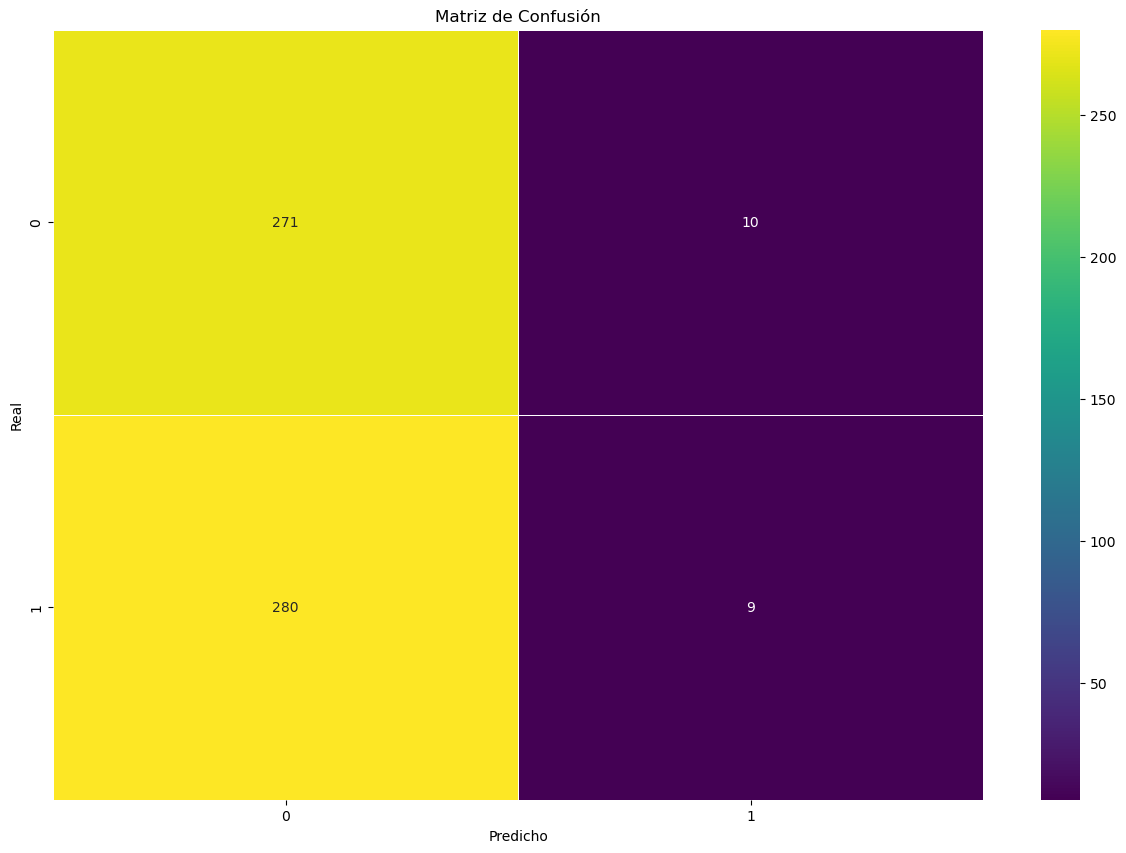

In [640]:
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

Lo que podemos ver aca es que tanto le pegamos a lo que predijimos o no, los true negative son 271, los false negative 280 (quieres predije que no convertian y convirtieron), 10 los false positive (quierenes dije convertian y no lo hicieron) y 9 los true positive quienres predije que iban a convertir y convirtieron

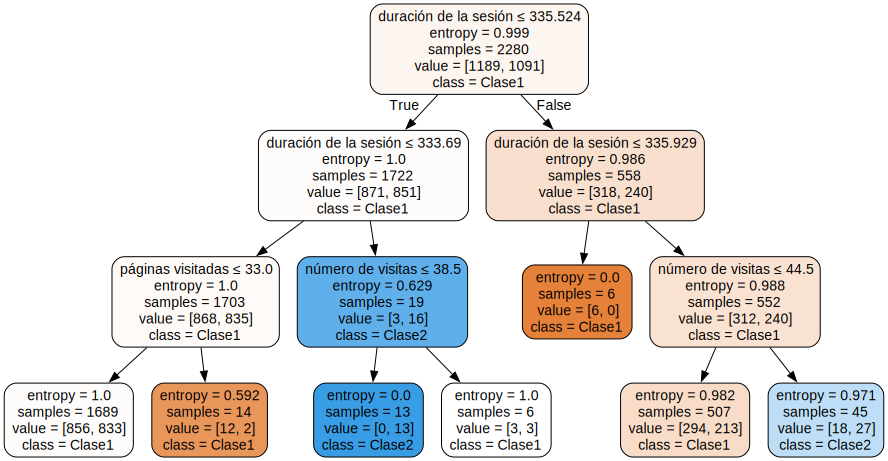

In [641]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz


# Exportar el árbol en formato DOT
dot_data = export_graphviz( decision_tree_model,
                           feature_names=X_train.columns,  
                           class_names=['Clase1', 'Clase2'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 

Comenzaria anlizando la duracion de la sesion de cada cliente (si fue mayor o menor a 335), y de acuerdo a eso las paginas visitadas o el numero de visitas de cada uno.

Ingreso para entrenar

In [643]:
import pandas as pd
from funciones_importantes import *


ingresoentrenar = pd.read_csv('ingreso_para_entrenar.csv')
ingresoentrenar.head()

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,0,437.086,318.443,246.279,7.000,6,56.235,319.511
1,1,955.643,835.756,235.234,3.000,8,52.604,430.491
2,2,758.795,1315.771,729.691,5.000,1,82.980,643.484
3,3,638.793,1111.726,237.160,3.000,3,50.025,322.259
4,4,240.417,1219.514,253.962,NaN,3,38.493,366.779


In [644]:
ingresoentrenar = ingresoentrenar.drop(columns=['Unnamed: 0'])
ingresoentrenar.shape

(1000, 7)

Tiene 1000 filas y 7 columnas

In [647]:
validate_columns(ingresoentrenar)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,gasto_alimentacion,"[437.0861069626262, 955.6428757689246, 758.794...",1000,0,"[317.8497443603504, 953.607976265941, 209.8344...",0.000
1,gasto_tecnologia,"[318.4427468159985, 835.7563736986193, 1315.77...",1000,0,"[256.6185372071942, 1048.8836879726314, 426.72...",0.000
2,gasto_moda,"[246.2792628019295, 235.23409930399987, 729.69...",950,50,"[662.8461065116888, 439.539394627953, 216.5569...",5.000
3,frecuencia_compra,"[7.0, 3.0, 5.0, nan, 4.0, 6.0, 2.0, 11.0, 1.0,...",12,80,"[8.0, 5.0, 4.0, 6.0, 2.0]",8.000
4,promociones_utilizadas,"[6, 8, 1, 3, 2, 7, 5, 9, 0, 4]",10,0,"[6, 9, 8, 1, 9]",0.000
5,distancia_a_hipermercados,"[56.23501640920522, 52.60374668509461, 82.9800...",1000,0,"[64.15310952419622, 67.50063343551143, 62.1724...",0.000
6,ingreso_cliente,"[319.51101553080935, 430.4908850154449, 643.48...",1000,0,"[267.62311444680546, 416.5036885322989, 236.74...",0.000


In [645]:
ingresoentrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gasto_alimentacion         1000 non-null   float64
 1   gasto_tecnologia           1000 non-null   float64
 2   gasto_moda                 950 non-null    float64
 3   frecuencia_compra          920 non-null    float64
 4   promociones_utilizadas     1000 non-null   int64  
 5   distancia_a_hipermercados  1000 non-null   float64
 6   ingreso_cliente            1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [646]:
ingresoentrenar.describe()

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
count,1000.000,1000.000,950.000,920.000,1000.000,1000.000,1000.000
mean,541.231,785.175,426.967,4.914,4.469,59.776,473.917
std,262.924,423.675,218.034,2.027,2.868,17.234,201.366
min,104.169,54.666,50.101,0.000,0.000,15.742,-82.996
25%,312.376,399.558,246.958,3.000,2.000,47.180,331.595
50%,547.127,802.164,423.766,5.000,5.000,57.105,478.242
75%,769.888,1152.674,620.454,6.000,7.000,71.501,612.444
max,999.746,1499.150,798.366,11.000,9.000,115.218,1082.557


In [652]:

promedio = ingresoentrenar['frecuencia_compra'].mean()

ingresoentrenar['frecuencia_compra'] = ingresoentrenar['frecuencia_compra'].fillna(promedio)
ingresoentrenar['gasto_moda'] = ingresoentrenar['gasto_moda'].fillna(0)


In [653]:
validate_columns(ingresoentrenar)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,gasto_alimentacion,"[437.0861069626262, 955.6428757689246, 758.794...",1000,0,"[691.851603070309, 823.304869209203, 495.22141...",0.000
1,gasto_tecnologia,"[318.4427468159985, 835.7563736986193, 1315.77...",1000,0,"[1162.423018950134, 1119.1677622123095, 378.65...",0.000
2,gasto_moda,"[246.2792628019295, 235.23409930399987, 729.69...",951,0,"[160.47728320922775, 293.82801157377423, 144.6...",0.000
3,frecuencia_compra,"[7.0, 3.0, 5.0, 4.914130434782609, 4.0, 6.0, 2...",13,0,"[6.0, 5.0, 4.0, 3.0, 8.0]",0.000
4,promociones_utilizadas,"[6, 8, 1, 3, 2, 7, 5, 9, 0, 4]",10,0,"[7, 8, 3, 6, 4]",0.000
5,distancia_a_hipermercados,"[56.23501640920522, 52.60374668509461, 82.9800...",1000,0,"[39.13405438961038, 55.42731164544382, 92.8769...",0.000
6,ingreso_cliente,"[319.51101553080935, 430.4908850154449, 643.48...",1000,0,"[236.7425151766187, 177.7889895886268, 463.457...",0.000


<Axes: >

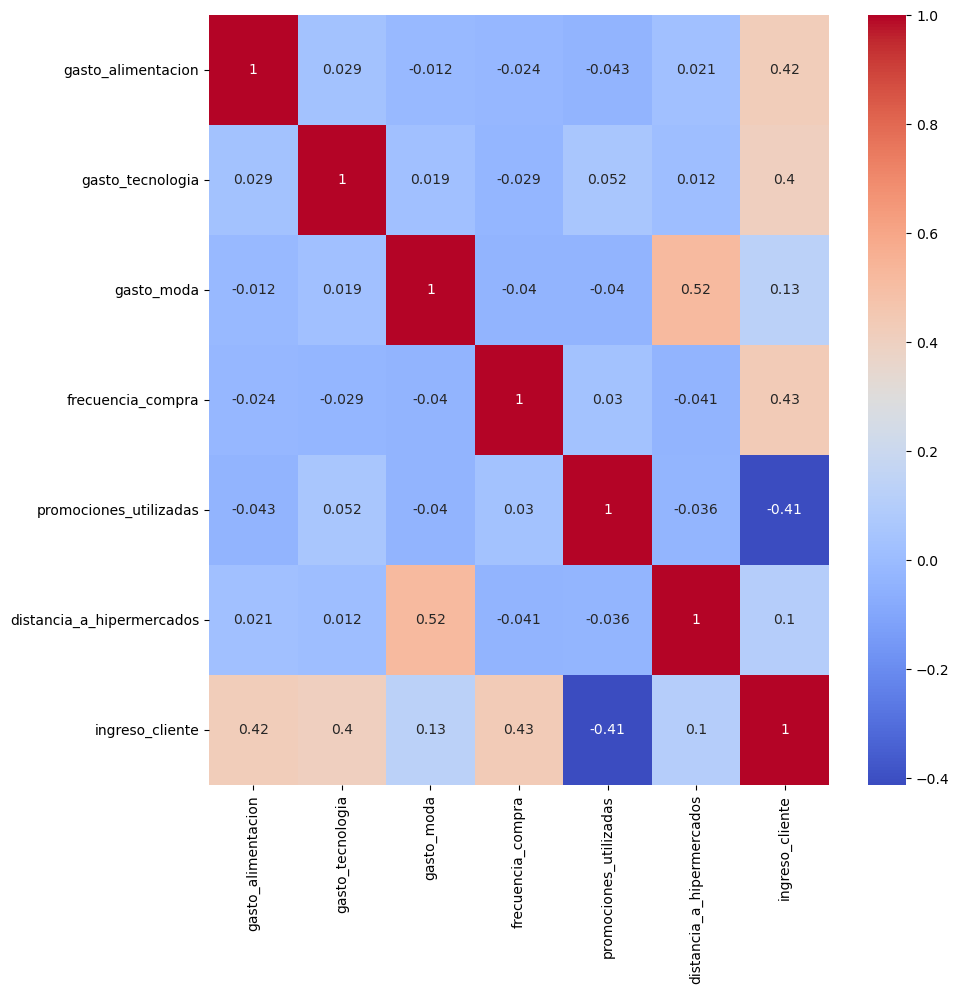

In [654]:
import numpy as np
numeric_columns = ingresoentrenar.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(numeric_columns.corr(), cmap = 'coolwarm', annot = True, annot_kws = {"size": 10})

In [672]:
ingresoentrenar.columns

Index(['gasto_alimentacion', 'gasto_tecnologia', 'gasto_moda',
       'frecuencia_compra', 'promociones_utilizadas',
       'distancia_a_hipermercados', 'ingreso_cliente'],
      dtype='object')

In [673]:
import statsmodels.formula.api as smf
features = ['gasto_alimentacion','gasto_tecnologia', 'gasto_moda','frecuencia_compra', 'promociones_utilizadas']

formula = "review_score ~ " + ' + '.join(features)
model = smf.ols(formula,data=df)
model=model.fit()
model.summary()
print(f" El modelo dio de r-cuadrado {model.rsquared}")


#GRAFICAR LOS INTERCEPTOS DEL MODELO EN UN GRAFICO DE BARRAS PARA ANALIZAR CUALES SON LAS VARIABLES MAS IMPORTANTES 
coeficientes = model.params.drop('Intercept')
nombres_caracteristicas = coeficientes.index
nombres_caracteristicas
#ajuto el grafico
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, [coef for coef in coeficientes], color='skyblue')
plt.xlabel('Coeficientes')
plt.title('Caracteristicas mas importantes')
plt.gca().invert_yaxis() #esto lo hago para ver la mas significativa primero
plt.show()

PatsyError: Error evaluating factor: NameError: name 'gasto_moda' is not defined
    review_score ~ gasto_alimentacion + gasto_tecnologia + gasto_moda + frecuencia_compra + promociones_utilizadas
                                                           ^^^^^^^^^^